<a href="https://colab.research.google.com/github/ThallesRodriguess/Project-Linear-Regression---Salary/blob/main/Project_Linear_Regression_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto simples iniciante de Data Science utilizando Machine Learning e método supervisionado de Regressão Linear. 


No método de aprendizado supervisionado, o sistema é programado ou treinado a partir de um conjunto de dados pré-definidos ou rotulados.


"Em estatística ou econometria, Regressão Linear é uma equação para se estimar a condicional de uma variável y, dados os valores de algumas outras variáveis x. A regressão, em geral, tem como objetivo tratar de um valor que não se consegue estimar inicialmente." (Wikipedia)


Esses dados consistem em salário e anos de experiência de 35 funcionários. Onde tentarei mostrar a relação entre salário e anos de experiência.


Foram utilizadas as bibliotecas Numpy, Pandas, Seaborn, Matplotlib e scikit-learn:


*   Pandas: para realizar o carregamento dos dados via csv.
*   Matplotlib: para fazer a plotação dos gráficos de acordo com os dados do csv carregados com o Pandas.
*   Seaborn: para fazer análise exploratória de dados com ferramentas de plotagem.
*   Numpy: para as funções matemáticas de álgebra linear
*   scikit-learn: biblioteca de aprendizado de máquina de código aberto para Python.

# Fazendo as importações das bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('Salary.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
df.shape

(35, 2)

In [ ]:
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


# Verificando correlação entre as colunas

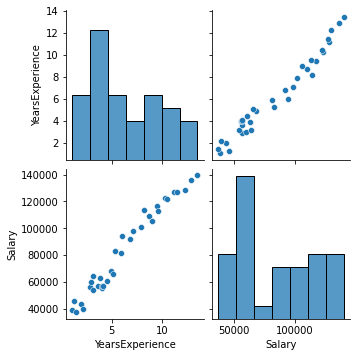

In [ ]:
sns.pairplot(df)

# Analisando a correlação entre os dados

In [ ]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.982427
Salary,0.982427,1.000000


# Dividindo o conjunto de dados em variáveis independentes (X) e dependentes (y)

In [ ]:
X = df.iloc[:, :-1].values    # usará os valores da coluna 'YearsExperience' para x
y = df.iloc[:, -1].values     # usará os valores da coluna 'YearsExperience' para y

# Dividindo o conjunto de dados em dados de treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Implementando o classificador baseado em regressão linear simples e instanciando a classe

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Resultado da previsão dos dados utilizados como teste

In [ ]:
predictions = model.predict(X_test)
predictions

array([120197.8256403 ,  88644.21802942,  74146.61453254, 118492.2252289 ,
        98025.02029212,  72441.01412114,  63913.01206415,  43445.80712736,
        64765.81226984, 112522.623789  , 107405.82255481])

# Valores onde o eixo y é cortado e do coeficiente

In [ ]:
#Intercept
print(model.intercept_)

#Slope
print(model.coef_)

30653.80404187284
[8528.00205699]


# Plotando o gráfico de regressão linear com melhor ajuste

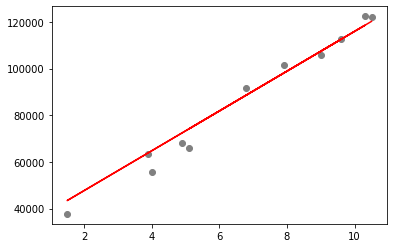

In [ ]:
plt.scatter(X_test, y_test, color="gray")
plt.plot(X_test, predictions, color="red")
plt.show()

# Plotando o gráfico de regressão linear com melhor ajuste dos valores de treino e predição dos treinos no eixo x

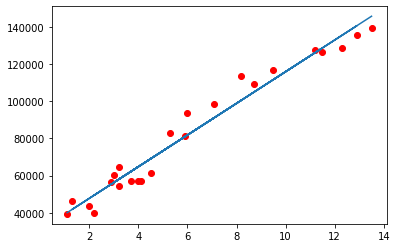

In [ ]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, model.predict(X_train))

Fazendo o cálculo das três métricas de erro comumente usadas para avaliar e relatar o desempenho de um modelo de regressão. 

Erro Absoluto Médio (MAE) em estatística é uma medida de erros entre observações pareadas que expressam o mesmo fenômeno fazendo comparações de previsto versus observado. Quanto menor o erro melhor será o resultado da previsão.

Erro Quadrático Médio (MSE) é comumente usado para verificar a acurácia de modelos e dá um maior peso aos maiores erros, já que, ao ser calculado, cada erro é elevado ao quadrado individualmente e, após isso, a média desses erros quadráticos é calculada.

Raiz do erro quadrático médio (RMSE) possui uma unidade igual à dimensão dos valores observados e preditos. Interpreta-se seu valor como uma medida do desvio médio entre observado e predito e dá um peso maior para desvios grandes.

E R2 , o coeficiente de determinação que na regressão é uma medida estatística de quão bem as previsões de regressão se aproximam dos pontos de dados reais. Um R2 de 1 indica que as previsões de regressão se ajustam perfeitamente aos dados.

In [ ]:
print("Mean Absolute Error (MAE): ", metrics.mean_absolute_error(y_test, predictions))
print("Mean Squared Error (MSE): ", metrics.mean_squared_error(y_test, predictions))
print("Root Mean Squared Error (RMSE): ", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R2 Score: ", metrics.r2_score(y_test, predictions))

Mean Absolute Error (MAE):  3807.469971826513
Mean Squared Error (MSE):  21950965.82414734
Root Mean Squared Error (RMSE):  4685.185783311836
R2 Score:  0.9714499470616078


# Plotando o gráfico de regressão linear comparando os valores de teste e predição

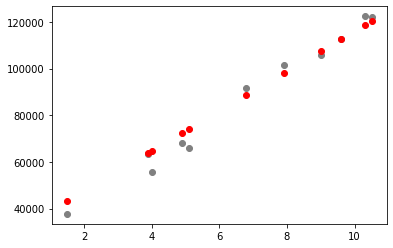

In [ ]:
plt.scatter(X_test, y_test, color = "gray")
plt.scatter(X_test, predictions, color = "red")
plt.show()

# Tabela com os valores atuais e previsões

In [ ]:
compare = pd.DataFrame({"Actual":y_test.flatten(), "Predicted":predictions.flatten()})
compare

,Actual,Predicted
0,121872,120197.825640
1,91738,88644.218029
2,66029,74146.614533
3,122391,118492.225229
4,101302,98025.020292
5,67938,72441.014121
6,63218,63913.012064
7,37731,43445.807127
8,55794,64765.812270
9,112635,112522.623789


# Tabela com valores onde o valor atual é maior que os valores previstos

In [ ]:
mask = compare['Opportunity'] = compare['Actual'] > compare['Predicted']

In [ ]:
compare[mask]

,Actual,Predicted,Opportunity
0,121872,120197.825640,True
1,91738,88644.218029,True
3,122391,118492.225229,True
4,101302,98025.020292,True
9,112635,112522.623789,True


In [ ]:
dif = (compare['Actual'] - compare['Predicted'] )

# Lista com a diferença entre os valores atuais e os valores previstos em ordem decrescente

In [ ]:
dif.sort_values(ascending=False)

3     3898.774771
4     3276.979708
1     3093.781971
0     1674.174360
9      112.376211
6     -695.012064
10   -1823.822555
5    -4503.014121
7    -5714.807127
2    -8117.614533
8    -8971.812270
dtype: float64

In [ ]:
import plotly.graph_objects as go

# Gráfico com valores atuais em azul e previsões em vermelho

In [ ]:
fig = go.Figure(data=[go.Scatter(y=y_test),         # azul = atual
                      go.Scatter(y=predictions)])   # vermelho = predição

fig.show()